# Goal

The goal of this project is to find any factors that appear to have an effect on fatality of pedestrians in vehicle-pedestrian crashes.

Tests such as visualizations and descriptive statistics, correlations, and chi-square tests for independence will be used.

# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

[Florida Non-Motorist Fatal and Serious Injuries, January-June 2019, FDOT](https://gis-fdot.opendata.arcgis.com/datasets/cd9e8dcee002441782d7657ee7b877d5/explore?location=27.442625%2C-83.677360%2C6.47)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Florida_NonMotorist_Fatal_and_Serious_Injuries_2019_4990189916879522819.csv'
df = pd.read_csv(path)

In [ ]:
print([df.columns])
df['Fatality'] = df['Person Injury Code'] - 4 # set fatality code to 0 (injured) or 1 (fatal)
df

[Index(['FID', 'Person Key', 'Crash Key', 'FDOT Crash Number',
       'FLHSMV Crash Number', 'Crash Date', 'Crash Time', 'Crash Time Slot',
       'Crash Day', 'FDOT Managing District', 'FDOT County Code', 'County',
       'FDOT Roadway ID', 'FDOT Mile Post', 'Road System', 'FDOT Latitude',
       'FDOT Longitude', 'Person Type Code', 'Person Type',
       'Person Gender Code', 'Person Gender', 'Person Age',
       'Person Injury Code', 'Person Injury', 'Person Location Code',
       'Person Location at Crash Time', 'Person Action Code',
       'Person Action Prior to Crash', 'Person Action/Circumstance Code',
       'Person Action/Circumstance', 'Suspected Alcohol Code',
       'Suspected Alcohol Use', 'Suspected Drug Code', 'Suspected Drug Use',
       'x', 'y'],
      dtype='object')]


,FID,Person Key,Crash Key,FDOT Crash Number,FLHSMV Crash Number,Crash Date,Crash Time,Crash Time Slot,Crash Day,FDOT Managing District,...,Person Action Prior to Crash,Person Action/Circumstance Code,Person Action/Circumstance,Suspected Alcohol Code,Suspected Alcohol Use,Suspected Drug Code,Suspected Drug Use,x,y,Fatality
0,1,880992810-2019-880992810-88099281,2019-880992810,880992810,88099281,04/01/2019 09:35:00 AM,9:35 AM,4: 9A-12P,1: Sun,3,...,Crossing roadway,1,No improper action,1,No,1,No,-9.639531e+06,3.560395e+06,0
1,2,880995770-2019-880995770-88099577,2019-880995770,880995770,88099577,04/23/2019 09:52:00 AM,9:52 AM,4: 9A-12P,2: Mon,5,...,Crossing roadway,2,Dart/dash,1,No,1,No,-9.063066e+06,3.326915e+06,0
2,3,880996320-2019-880996320-88099632,2019-880996320,880996320,88099632,04/15/2019 07:23:00 PM,7:23 PM,7: 6P-9P,1: Sun,1,...,Waiting to cross roadway,1,No improper action,1,No,1,No,-9.182127e+06,3.190972e+06,1
3,4,881010510-2019-881010510-88101051,2019-881010510,881010510,88101051,03/21/2019 08:57:00 AM,8:57 AM,3: 6A-9A,4: Wed,5,...,Waiting to cross roadway,1,No improper action,1,No,1,No,-9.057531e+06,3.306669e+06,0
4,5,881022360-2019-881022360-88102236,2019-881022360,881022360,88102236,03/07/2019 09:03:00 AM,9:03 AM,4: 9A-12P,4: Wed,5,...,Crossing roadway,1,No improper action,1,No,1,No,-9.051078e+06,3.324297e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,905,880982700-2019-880982700-88098270,2019-880982700,880982700,88098270,03/03/2019 09:41:00 PM,9:41 PM,8: 9P-12A,7: Sat,7,...,Walking/cycling on sidewalk,1,No improper action,88,Unknown,88,Unknown,-9.201769e+06,3.297268e+06,0
905,906,880986170-2019-880986170-88098617,2019-880986170,880986170,88098617,03/27/2019 08:21:00 PM,8:21 PM,7: 6P-9P,3: Tue,7,...,Walking/cycling on sidewalk,1,No improper action,1,No,1,No,-9.210618e+06,3.271310e+06,0
906,907,880986450-2019-880986450-88098645,2019-880986450,880986450,88098645,03/04/2019 04:11:00 PM,4:11 PM,6: 3P-6P,1: Sun,1,...,Other,1,No improper action,1,No,1,No,-9.182474e+06,3.160847e+06,0
907,908,880988020-2019-880988020-88098802,2019-880988020,880988020,88098802,05/02/2019 01:45:00 AM,1:45 AM,1: 12A-3A,4: Wed,3,...,Walking/cycling along roadway against traffic ...,1,No improper action,1,No,1,No,-9.689055e+06,3.554295e+06,0


# Testing

## Time of Day and Week
In addition to testing data, this section also introduces the tests to be used.

Firstly, new columns have to be added to ensure better workability of the dataset. The dataset is then split into appropriate, grouped subsets.

In [ ]:
# Relevant data: Crash Time Slot, Crash Day, Fatality
df['Time Code'] = [int(x[0])-1 for x in df['Crash Time Slot']]
time_codes = ['12a-3a','3a-6a','6a-9a','9a-12p','12p-3p','3p-6p','6p-9p','9p-12a']
tdf = df[['Time Code','Fatality']]

df['Day Code'] = [int(x[0])-1 for x in df['Crash Day']]
day_codes = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
wdf = df[['Day Code','Fatality']]

### Descriptive Statistics

The first set of charts will plot the total number of pedestrian impacts on a given time of day and day of week.

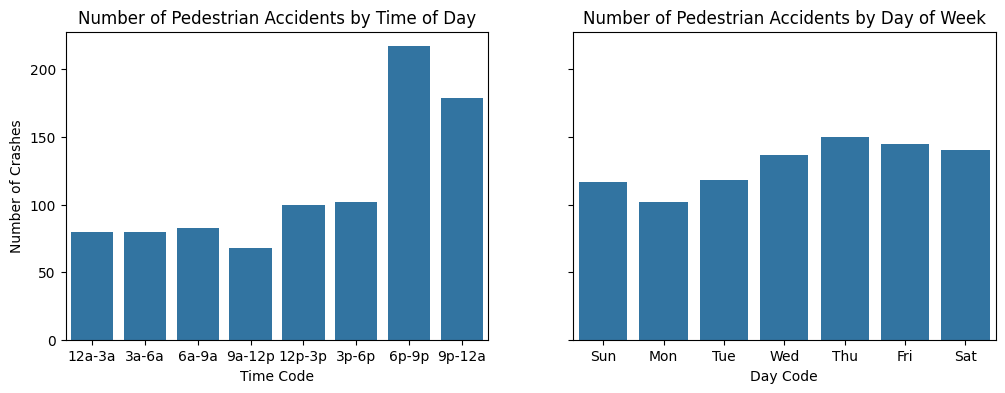

In [ ]:
_,ax = plt.subplots(1,2,figsize=(12,4),sharey=True)
sns.countplot(ax=ax[0], data=tdf, x='Time Code') # plot accidents by time
ax[0].set_xticks(range(8),time_codes)
ax[0].set_ylabel('Number of Crashes')
ax[0].set_title('Number of Pedestrian Accidents by Time of Day')
sns.countplot(ax=ax[1], data=wdf, x='Day Code') # plot accidents by weekday
ax[1].set_xticks(range(7),day_codes)
ax[1].set_title('Number of Pedestrian Accidents by Day of Week')
plt.show()

Next, the specific ratio of fatal impacts to total will be charted.

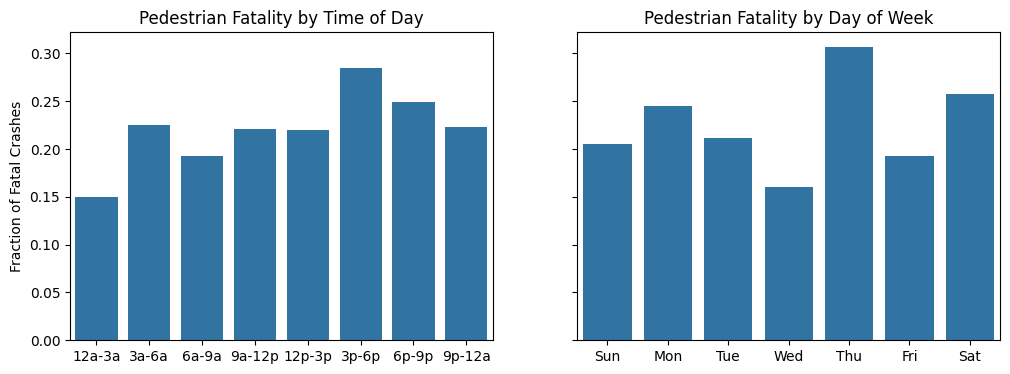

In [ ]:
_,ax = plt.subplots(1,2,figsize=(12,4),sharey=True)
sns.barplot(ax=ax[0], x=range(8), y=tdf.groupby('Time Code').mean()['Fatality']) # plot fatality by time
ax[0].set_xticks(range(8),time_codes)
ax[0].set_ylabel('Fraction of Fatal Crashes')
ax[0].set_title('Pedestrian Fatality by Time of Day')
sns.barplot(ax=ax[1], x=range(7), y=wdf.groupby('Day Code').mean()['Fatality']) # plot fatality by weekday
ax[1].set_xticks(range(7),day_codes)
ax[1].set_title('Pedestrian Fatality by Day of Week')
plt.show()

Both sets of charts show that there is reason to suspect time of day and day of week both may have significant effects on crash likelihood and fatality. To test if they are truly dependent and affect the chance of death, a chi-square test must be conducted.

### Chi-Square Test

To conduct a chi-square test for independence, firstly the observed values for all variables needs to be found.

In [ ]:
# for each category, format values as a list of tuples of (fatalities, nonfatalities) for each time/day
observed_time = []
for i in range(8):
  observed_time.append((sum(tdf[tdf['Time Code']==i]['Fatality']),len(tdf[tdf['Time Code']==i])-sum(tdf[tdf['Time Code']==i]['Fatality'])))

observed_day = []
for i in range(7):
  observed_day.append((sum(wdf[wdf['Day Code']==i]['Fatality']),len(wdf[wdf['Day Code']==i])-sum(wdf[wdf['Day Code']==i]['Fatality'])))

print('Observed Fatalities by Time:',observed_time,'\nObserved Fatalities by Day:',observed_day,)

Observed Fatalities by Time: [(12, 68), (18, 62), (16, 67), (15, 53), (22, 78), (29, 73), (54, 163), (40, 139)] 
Observed Fatalities by Day: [(24, 93), (25, 77), (25, 93), (22, 115), (46, 104), (28, 117), (36, 104)]


Next, the expected values for all variables need to be calculated, utilizing a contingency chart.

In [ ]:
total = len(df)

expected_time = []
for time in range(len(observed_time)):
  expected_time.append([])
  for item in range(len(observed_time[time])):
    expected_time[-1].append(sum(observed_time[time])*sum([row[item] for row in observed_time])/total)

# the expected value for each point (e.g. fatalities at 3pm) is total of the row (crashes at 3pm) times the fraction of the column (overall fatality rate)

expected_day = []
for day in range(len(observed_day)):
  expected_day.append([])
  for item in range(len(observed_day[day])):
    expected_day[-1].append(sum(observed_day[day])*sum([row[item] for row in observed_day])/total)

Now, for the chi-squared test, the expected and observed values must be compared. The expected values are calculated under the assumption that the fatality rate is equal for every time of day and day of week. If these values are significantly different above a critical value (significance calculated using the formula below), then we can reject the possiblity of crash fatality rate and time/day being independent of eachother.

$\chi^2 = \sum{(O_i - E_i)^2\over{E_i}}$

If $\chi^2>$ Critical Value, then independence can be rejected.

Using a 95% significance level, the critical values are 14.067 for time (7 DF) and 12.592 for weekdays (6 DF)

In [ ]:
chi = 0
for i in range(len(observed_time)):
  for j in range(len(observed_time[i])):
    chi += (observed_time[i][j]-expected_time[i][j])**2/expected_time[i][j] # implement above formula
print('Time Chi-square statistic:',round(chi,3),'   Greater than 14.067?',chi>14.067)

chi = 0
for i in range(len(observed_day)):
  for j in range(len(observed_day[i])):
    chi += (observed_day[i][j]-expected_day[i][j])**2/expected_day[i][j] # do it again
print('Day Chi-square statistic:',round(chi,3),'   Greater than 12.592?',chi>12.592)

Time Chi-square statistic: 5.822    Greater than 14.067? False
Day Chi-square statistic: 11.22    Greater than 12.592? False


At a 5% significance level, this test does *not* disprove independence for time and fatality nor day and fatality. *However*, at 10% significance, it *does* disprove independence between day and fatality. While it is unlikely time of day has an effect on fatality rates, there is 90% confidence that day of the week does have some kind of influence.

## Alcohol and Drug use

In [ ]:
# Relevant data: Suspected Alcohol Code, Suspected Drug Code, Fatality
df['Alcohol Code'] = [0 if x==1 else 1 if x==2 else -1 for x in df['Suspected Alcohol Code']]
alcohol_codes = ['No Alcohol Use','Alcohol Use']
adf = df[['Alcohol Code','Fatality']][df['Alcohol Code'] >= 0] # exclude na/unknown alcohol state

df['Drug Code'] = [0 if x==1 else 1 if x==2 else -1 for x in df['Suspected Drug Code']]
drug_codes = ['No Drug Use','Drug Use']
ddf = df[['Drug Code','Fatality']][df['Drug Code'] >= 0] # exclude na/unknown drug state

### Descriptive Statistics

Using this data, the only relevant visualization is fatality rates of crashes with and without drugs/alcohol involved.

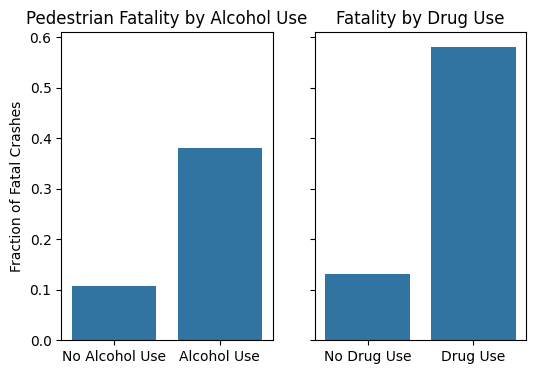

In [ ]:
_,ax = plt.subplots(1,2,figsize=(6,4),sharey=True)
sns.barplot(ax=ax[0], x=range(2), y=adf.groupby('Alcohol Code').mean()['Fatality']) # plot fatality by alcohol use
ax[0].set_xticks(range(2),alcohol_codes)
ax[0].set_ylabel('Fraction of Fatal Crashes')
ax[0].set_title('Pedestrian Fatality by Alcohol Use')
sns.barplot(ax=ax[1], x=range(2), y=ddf.groupby('Drug Code').mean()['Fatality']) # plot fatality by drug use
ax[1].set_xticks(range(2),drug_codes)
ax[1].set_title('Fatality by Drug Use')
plt.show()

The chart shows an extreme effect between alcohol/drug use and deaths versus sober driving. From the chart alone, it appears to be a given relationship, a chi-square test is still warranted to confirm, especially with the low sample size of suspected drug use.

### Chi-Square Test

Firstly, observed and expected values need to be compiled.

In [ ]:
# for each category, format values as a list of tuples of (fatalities, nonfatalities) for each alcohol/drug use
observed_alcohol = [list(adf.groupby('Fatality').sum()['Alcohol Code'])[::-1], # fatal/nonfatal with alcohol
                    list(adf.groupby('Fatality').count()['Alcohol Code']-adf.groupby('Fatality').sum()['Alcohol Code'])[::-1]] # fatal/nonfatal without alcohol
observed_drugs = [list(ddf.groupby('Fatality').sum()['Drug Code'])[::-1], # fatal/nonfatal with drugs
                  list(ddf.groupby('Fatality').count()['Drug Code']-ddf.groupby('Fatality').sum()['Drug Code'])[::-1]] # fatal/nonfatal without drugs
print('Observed Fatalities by Alcohol Use:',observed_alcohol,'\nObserved Fatalities by Drug Use:',observed_drugs)

Observed Fatalities by Alcohol Use: [[60, 98], [63, 521]] 
Observed Fatalities by Drug Use: [[18, 13], [86, 569]]


In [ ]:
# both expected categories are calculated with the total amount of fatalities/nonfatalities times the total alcohol/drugs/sober, divided by the total amount
expected_alcohol = [[sum(adf['Fatality'])*sum(adf['Alcohol Code'])/len(adf),sum(adf['Fatality']==0)*sum(adf['Alcohol Code'])/len(adf)], # fatal/nonfatal with alcohol
                    [sum(adf['Fatality'])*sum(adf['Alcohol Code']==0)/len(adf),sum(adf['Fatality']==0)*sum(adf['Alcohol Code']==0)/len(adf)]] # fatal/nonfatal without alcohol
expected_drugs = [[sum(ddf['Fatality'])*sum(ddf['Drug Code'])/len(ddf),sum(ddf['Fatality']==0)*sum(ddf['Drug Code'])/len(ddf)], # fatal/nonfatal with drugs
                  [sum(ddf['Fatality'])*sum(ddf['Drug Code']==0)/len(ddf),sum(ddf['Fatality']==0)*sum(ddf['Drug Code']==0)/len(ddf)]] # fatal/nonfatal without drugs

For the chi-square test, the expected and observed values for alcohol fatalities and drug fatalities must be compared using the same formula as before. Both categories have DF 1, for a critical value of 3.841 for both categories to beat.

In [ ]:
chi = 0
for i in range(len(observed_alcohol)):
  for j in range(len(observed_alcohol[i])):
    chi += (observed_alcohol[i][j]-expected_alcohol[i][j])**2/expected_alcohol[i][j]
print('Alcohol Chi-square statistic:',round(chi,3),'   Greater than 3.841?',chi>3.841)

chi = 0
for i in range(len(observed_drugs)):
  for j in range(len(observed_drugs[i])):
    chi += (observed_drugs[i][j]-expected_drugs[i][j])**2/expected_drugs[i][j]
print('Drug Chi-square statistic:',round(chi,3),'   Greater than 3.841?',chi>3.841)

Alcohol Chi-square statistic: 66.466    Greater than 3.841? True
Drug Chi-square statistic: 46.466    Greater than 3.841? True


Both categories' chi-square tests show an extremely high value output, both over ten times larger than the critical value. This correlates to a very low p-value, such that the chance of drugs and alcohol *not* affecting fatality rate is extremely small; there is almost definitely a relationship.

## Age of Victim

For ease of use, the additional column for pedestrian age will also be separated into groups in order to make more testing possible.

In [ ]:
# Relevant data: Person Age and Fatality
df['Age Group'] = df['Person Age']//10
age_codes = ['<10','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100+']
odf = df[['Age Group','Fatality']]

### Descriptive Statistics

For age groups, both number of crashes per age group and fatality rates per age group may be relevant, so they are both charted below.

In [ ]:
_,ax = plt.subplots(1,2,figsize=(14,4))
sns.barplot(ax=ax[0], x=range(11), y=odf.groupby('Age Group').count()['Fatality']) # plot fatality by alcohol use
ax[0].set_xticks(range(11),age_codes)
ax[0].set_ylabel('Number of Crashes')
ax[0].set_title('Pedestrian crashes by Age')
sns.barplot(ax=ax[1], x=range(11), y=odf.groupby('Age Group').mean()['Fatality']) # plot fatality by drug use
ax[1].set_xticks(range(11),age_codes)
ax[1].set_title('Fatality rate by Age')
ax[1].set_ylabel('Fraction of Fatal Crashes')
plt.show()

The charts show that the number of crashes is skewed, most likely by population amount; however, the fatality rate is heavily skewed to the rate, evident that older pedestrians are more likely to be killed in the event of a crash.

### Chi-Square Test

Observed and expected amounts must be compiled for all age groups and fatalities.

In [ ]:
# calculate observed age fatalities by evaluating fatality amounts for all age groups
observed_age = []
for i in range(11):
  observed_age.append((sum(odf[odf['Age Group']==i]['Fatality']),len(odf[odf['Age Group']==i])-sum(odf[odf['Age Group']==i]['Fatality'])))

# calculate expected age fatalities by multiplying age proportion by fatality rate
expected_age,total = [],len(df)
for group in range(len(observed_age)):
  expected_age.append([])
  for item in range(len(observed_age[group])):
    expected_age[-1].append(sum(observed_age[group])*sum([row[item] for row in observed_age])/total)

for age in range(len(observed_age)):
  print(age_codes[age]+':')
  print(f'  Observed values: {observed_age[age]}\n  Expected values: ({expected_age[age][0]:.3f}, {expected_age[age][1]:.3f})')

With the amounts found above, a Chi-Square test can be conducted at 95% significance against the critical value of 18.307 (DF 10)

In [ ]:
chi = 0
for i in range(len(observed_age)):
  for j in range(len(observed_age[i])):
    chi += (observed_age[i][j]-expected_age[i][j])**2/expected_age[i][j]
print('Age Chi-square statistic:',round(chi,3),'   Greater than 18.307?',chi>18.307)

The Chi-Square test gives sufficient evidence of a relationship between age and impact fatality; the chi statistic is very high, making for a substantially low p-value.

### Correlation Test

In addition to simply looking at graphs, another test can also be used to show how strong of a correlation there is between age and fatality rates, and whether that correlation is positive or negative; calculating the Pearson Correlation Coefficient.

The coefficient is defined as:

$r_{xy} = {\sum(x-\bar{x})(y-\bar{y}) \over \sqrt{(\sum(x-\bar{x})^2)*(\sum(y-\bar{y})^2)}}$

For simplicity, the calculation will be split into three parts and then compiled afterwards.

$p1 = \sum(x-\bar{x})(y-\bar{y})$

$p2 = \sum(x-\bar{x})^2$

$p3 = \sum(y-\bar{y})^2$

$r_{xy} = {p1 \over \sqrt{p2*p3}}$

In [ ]:
p1,p2,p3 = 0,0,0
x,y = df['Person Age'],df['Fatality']
mx = sum(x)/len(x) # mean of x (age)
my = sum(y)/len(y) # mean of y (fatality rate)
for i in range(len(x)):
  p1 += (x[i]-mx)*(y[i]-my)
  p2 += (x[i]-mx)**2
  p3 += (y[i]-my)**2
correl = p1/(p2*p3)**0.5
print(correl)

With a correlation coefficient of $r_{xy}=0.169$, there appears to be a positive relationship between age and fatality rate, but it includes a significant amount of variance. This is consistent with the results of the other tests.

## Pedestrian Location

In [ ]:
# Relevant data: Person Location Code, Fatality
df['Location Code'] = df['Person Location Code']-1
location_codes = ['Crosswalk Intersection','Unmarked Intersection','Other Intersection','Crosswalk Midblock','Car Lane','Bicycle Lane','Roadside','Sidewalk','Median','Driveway','Shared Path','No-Traffic Area']
ldf = df[['Location Code','Fatality']][df['Location Code']<76] # exclude na/unknown/other location state

### Descriptive Statistics


The location of a pedestrian should have a significant effect on both the fatality rate of the crash and the likelihood of a crash.

In [ ]:
_,ax = plt.subplots(2,1,figsize=(18,8))
sns.barplot(ax=ax[0], x=range(12), y=ldf.groupby('Location Code').count()['Fatality']) # plot fatality by alcohol use
ax[0].set_xticks(range(12),location_codes)
ax[0].set_ylabel('Number of Crashes')
ax[0].set_title('Pedestrian crashes by Location')
ax[0].tick_params(labelrotation=8)
sns.barplot(ax=ax[1], x=range(12), y=ldf.groupby('Location Code').mean()['Fatality']) # plot fatality by drug use
ax[1].set_xticks(range(12),location_codes)
ax[1].set_title('Fatality rate by Location')
ax[1].set_ylabel('Fraction of Fatal Crashes')
ax[1].tick_params(labelrotation=8)
plt.show()

Based on this chart, location appears to have a strong effect on fatality rates; some locations have as much as one-third of crashes be fatal, while others have less than one-tenth; even with strong sample size.

### Chi-Square Test

In [ ]:
# calculate observed location fatalities by evaluating fatality amounts for all locations
observed_location = []
for i in range(12):
  observed_location.append((sum(ldf[ldf['Location Code']==i]['Fatality']),len(ldf[ldf['Location Code']==i])-sum(ldf[ldf['Location Code']==i]['Fatality'])))

# calculate expected location fatalities by multiplying location proportion by fatality rate
expected_location,total = [],len(ldf)
for place in range(len(observed_location)):
  expected_location.append([])
  for item in range(len(observed_location[place])):
    expected_location[-1].append(sum(observed_location[place])*sum([row[item] for row in observed_location])/total)

for place in range(len(observed_location)):
  print(location_codes[place]+':')
  print(f'  Observed values: {observed_location[place]}\n  Expected values: ({expected_location[place][0]:.3f}, {expected_location[place][1]:.3f})')

With the amounts found above, a Chi-Square test can be conducted at 95% significance against the critical value of 19.675 (DF 11)

In [ ]:
chi = 0
for i in range(len(observed_location)):
  for j in range(len(observed_location[i])):
    chi += (observed_location[i][j]-expected_location[i][j])**2/expected_location[i][j]
print('Location Chi-square statistic:',round(chi,3),'   Greater than 19.675?',chi>19.675)

Based on a statistic of over 52, the chance of traffic accident location and pedestrian chance of death are strongly linked, with some locations of impact being more likely to result in death than others.

## Pedestrian Activity

In [ ]:
# Relevant data: Person Action Code, Fatality
# Removed irrelevant/small categories: Walking to School, Incident Response in Traffic
df['Action Code'] = df['Person Action Code']-1
action_codes = ['Crossing Road','Waiting to Cross','Moving along road with traffic','Moving along road against traffic','On sidewalk','Work/Play on road','Walking on median']
cdf = df[['Action Code','Fatality']][df['Action Code']<7] # exclude na/unknown/other location state

### Descriptive Statistics

In [ ]:
_,ax = plt.subplots(2,1,figsize=(12,8))
sns.barplot(ax=ax[0], x=range(7), y=cdf.groupby('Action Code').count()['Fatality']) # plot fatality by alcohol use
ax[0].set_xticks(range(7),action_codes)
ax[0].set_ylabel('Number of Crashes')
ax[0].set_title('Pedestrian crashes by Activity')
ax[0].tick_params(labelrotation=8)
sns.barplot(ax=ax[1], x=range(7), y=cdf.groupby('Action Code').mean()['Fatality']) # plot fatality by drug use
ax[1].set_xticks(range(7),action_codes)
ax[1].set_title('Fatality rate by Activity')
ax[1].set_ylabel('Fraction of Fatal Crashes')
ax[1].tick_params(labelrotation=8)
plt.tight_layout()
plt.show()

Based on these charts, the actions of a pedestrian prior to impact seem to have a significant effect. Working/Playing on the road appears to be the most fatal activity, while crossing the road the most dangerous. Notably, moving against traffic is much safer than moving with.

### Chi-Square Test

In [ ]:
# calculate observed action fatalities by evaluating fatality amounts for all actions
observed_action = []
for i in range(7):
  observed_action.append((sum(cdf[cdf['Action Code']==i]['Fatality']),len(cdf[cdf['Action Code']==i])-sum(cdf[cdf['Action Code']==i]['Fatality'])))

# calculate expected action fatalities by multiplying action proportion by fatality rate
expected_action,total = [],len(cdf)
for action in range(len(observed_action)):
  expected_action.append([])
  for item in range(len(observed_action[action])):
    expected_action[-1].append(sum(observed_action[action])*sum([row[item] for row in observed_action])/total)

for action in range(len(observed_action)):
  print(action_codes[action]+':')
  print(f'  Observed values: {observed_action[action]}\n  Expected values: ({expected_action[action][0]:.3f}, {expected_action[action][1]:.3f})')

With the amounts found above, a Chi-Square test can be conducted at 95% significance against the critical value of 12.592 (DF 6)

In [ ]:
chi = 0
for i in range(len(observed_action)):
  for j in range(len(observed_action[i])):
    chi += (observed_action[i][j]-expected_action[i][j])**2/expected_action[i][j]
print('Activity Chi-square statistic:',round(chi,3),'   Greater than 12.592?',chi>12.592)

The result of this Chi-Square test, 18.64, represents a p-value of approx. 0.005. This means that, with 99.5% confidence, we can conclude that pedestrian activity has some kind of correlation with the chance of a potential impact being fatal.

## Conclusions

Based on all the testing, there is strong evidence for alcohol use, drug use, age, location and activity having a relationship with the chance of fatality versus survival in the event of a pedestrian impact. Time-related variables, such as time of day and day of week, did not have strong enough evidence to say anything for sure, although there is a high likelihood for day of week having a correlation.